# Modelo de Deep Learning de prediccion de insumos

## Datos

In [51]:
import pandas as pd

dtype_dict = {
    'PLANT': str,
    'AñoSem': str,
    'ID_MATERIAL': str,
    'Piezas': float,
    'ImporteFarmacia': float
}

df = pd.read_csv('data/Salida_Ventas_Nacional_36_MESESv2.csv', delimiter='|', dtype=dtype_dict)

In [52]:
# Print the first few rows of the DataFrame
df.head()

PLANT  AñoSem ID_MATERIAL  Piezas  ImporteFarmacia
0  2000  2020-3        3542  1360.0         20672.00
1  2000  2020-3        3559   480.0          9004.80
2  2000  2020-3        3584   680.0          4766.80
3  2000  2020-3       11251   345.0          9977.40
4  2000  2020-3       19070  1176.0         37796.64

In [53]:
# statistic info about data

df.describe().style.format({
    'Piezas': '{:,.2f}'.format,
    'ImporteFarmacia': '{:,.2f}'.format
    })

In [54]:
df.dtypes

PLANT               object
AñoSem              object
ID_MATERIAL         object
Piezas             float64
ImporteFarmacia    float64
dtype: object

In [55]:
df.head(1)

PLANT  AñoSem ID_MATERIAL  Piezas  ImporteFarmacia
0  2000  2020-3        3542  1360.0          20672.0

## Preprocesamiento


### 1. Convertir columna a fecha

Primero, vamos a convertir la columna `AñoSem` a una columna de fecha tomando el primer día de la semana indicada. Esto nos permitirá manejar los datos como una serie temporal.

In [56]:
df['Fecha'] = pd.to_datetime(df['AñoSem'].astype(str) + '0', format='%Y-%U%w')
df.head()

PLANT  AñoSem ID_MATERIAL  Piezas  ImporteFarmacia      Fecha
0  2000  2020-3        3542  1360.0         20672.00 2020-01-19
1  2000  2020-3        3559   480.0          9004.80 2020-01-19
2  2000  2020-3        3584   680.0          4766.80 2020-01-19
3  2000  2020-3       11251   345.0          9977.40 2020-01-19
4  2000  2020-3       19070  1176.0         37796.64 2020-01-19

### 2. Ordenar el DataFrame

Nos aseguraremos que los datos estén ordenados cronológicamente por la nueva columna de fecha.

In [57]:
df.sort_values('Fecha', inplace=True)
df.head()

PLANT  AñoSem ID_MATERIAL  Piezas  ImporteFarmacia      Fecha
9745734   3060  2020-1           1    13.0          4177.48 2020-01-05
23578818  3130  2020-1       32497     1.0            61.52 2020-01-05
23578819  3130  2020-1       32500   108.0          1436.40 2020-01-05
23578820  3130  2020-1       32501     4.0          2073.28 2020-01-05
23578821  3130  2020-1       32506     2.0            54.06 2020-01-05

In [58]:
df.tail()

PLANT  AñoSem ID_MATERIAL  Piezas  ImporteFarmacia      Fecha
5232706   3020  2024-1        6041     3.0           265.83 2024-01-07
5232707   3020  2024-1        6047     2.0          1631.10 2024-01-07
5232708   3020  2024-1        6053     1.0           790.34 2024-01-07
5232696   3020  2024-1        6014     1.0           945.98 2024-01-07
25502823  3130  2024-1       52753     2.0         15984.00 2024-01-07

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25502824 entries, 9745734 to 25502823
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   PLANT            object        
 1   AñoSem           object        
 2   ID_MATERIAL      object        
 3   Piezas           float64       
 4   ImporteFarmacia  float64       
 5   Fecha            datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.3+ GB


### 3. Tratar valores faltantes

Verificaremos la presencia de valores faltantes en las columnas `Piezas` e `ImporteFarmacia` y decidiremos cómo tratarlos.

In [60]:
# Check for NA values
na_mask = df.isnull()

# Check for any NA values in each column
any_na_cols = na_mask.any(axis=0)
print(any_na_cols)  # Output: Series([ True,  True,  True], dtype=bool)

# Check for any NA values in each row
any_na_rows = na_mask.any(axis=1)
print(any_na_rows)  # Output: Series([False,  True,  False], dtype=bool)

# Count NA values in each column
na_counts_cols = na_mask.sum(axis=0)
print(na_counts_cols)

PLANT              False
AñoSem             False
ID_MATERIAL        False
Piezas             False
ImporteFarmacia    False
Fecha              False
dtype: bool
9745734     False
23578818    False
23578819    False
23578820    False
23578821    False
            ...  
5232706     False
5232707     False
5232708     False
5232696     False
25502823    False
Length: 25502824, dtype: bool
PLANT              0
AñoSem             0
ID_MATERIAL        0
Piezas             0
ImporteFarmacia    0
Fecha              0
dtype: int64


### 4. Normalizar columnas numericas
Normalizaremos las columnas Piezas e ImporteFarmacia para facilitar el entrenamiento del modelo más adelante.

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Piezas', 'ImporteFarmacia']] = scaler.fit_transform(df[['Piezas', 'ImporteFarmacia']])
df.head()

PLANT  AñoSem ID_MATERIAL    Piezas  ImporteFarmacia      Fecha
9745734   3060  2020-1           1  0.000015         0.000104 2020-01-05
23578818  3130  2020-1       32497  0.000000         0.000002 2020-01-05
23578819  3130  2020-1       32500  0.000132         0.000036 2020-01-05
23578820  3130  2020-1       32501  0.000004         0.000052 2020-01-05
23578821  3130  2020-1       32506  0.000001         0.000001 2020-01-05

#### Visualizacion

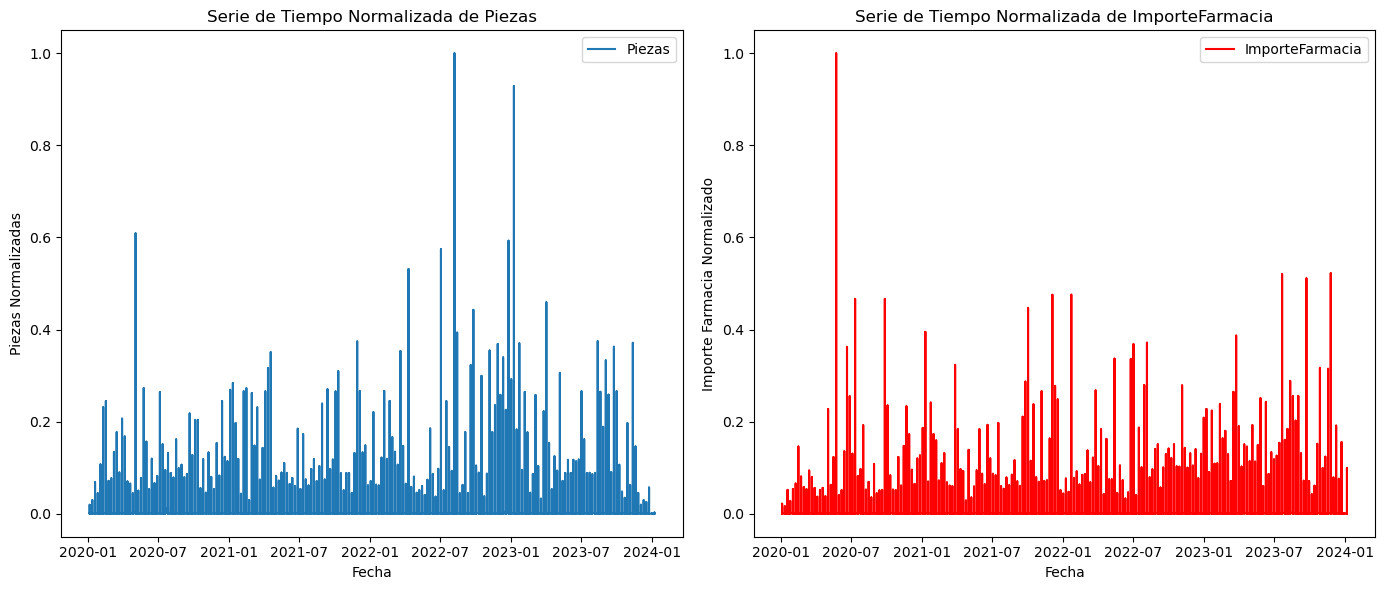

In [62]:
import matplotlib.pyplot as plt

# Graficar Piezas
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.plot(df['Fecha'], df['Piezas'], label='Piezas')
plt.title('Serie de Tiempo Normalizada de Piezas')
plt.xlabel('Fecha')
plt.ylabel('Piezas Normalizadas')
plt.legend()

# Graficar ImporteFarmacia
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.plot(df['Fecha'], df['ImporteFarmacia'], label='ImporteFarmacia', color='red')
plt.title('Serie de Tiempo Normalizada de ImporteFarmacia')
plt.xlabel('Fecha')
plt.ylabel('Importe Farmacia Normalizado')
plt.legend()

plt.tight_layout()
plt.show()

### 5. Estructuracion para series de tiempo
Para utilizar los datos en un modelo que combine CNN y RNN, es fundamental estructurar los datos en un formato adecuado para series de tiempo. Esto usualmente significa crear "ventanas" de datos pasados para predecir puntos futuros.

#### Inicialización y Ajuste del Escalador:
- El `MinMaxScaler` se inicializa y se ajusta usando solo la columna 'Piezas' del conjunto completo de datos para calcular los valores mínimos y máximos.

#### Transformación de Datos:
- Aplicamos la transformación a la misma columna en ambos el conjunto completo y la muestra. Esto asegura que la normalización sea consistente entre ambos.

#### Visualización:
Utilizamos matplotlib.pyplot para crear un gráfico que muestra tanto el conjunto completo como la muestra. Usamos transparencia (alpha=0.5) para hacer las líneas semi-transparentes, lo que ayuda a visualizar la superposición y las diferencias entre los conjuntos de datos.

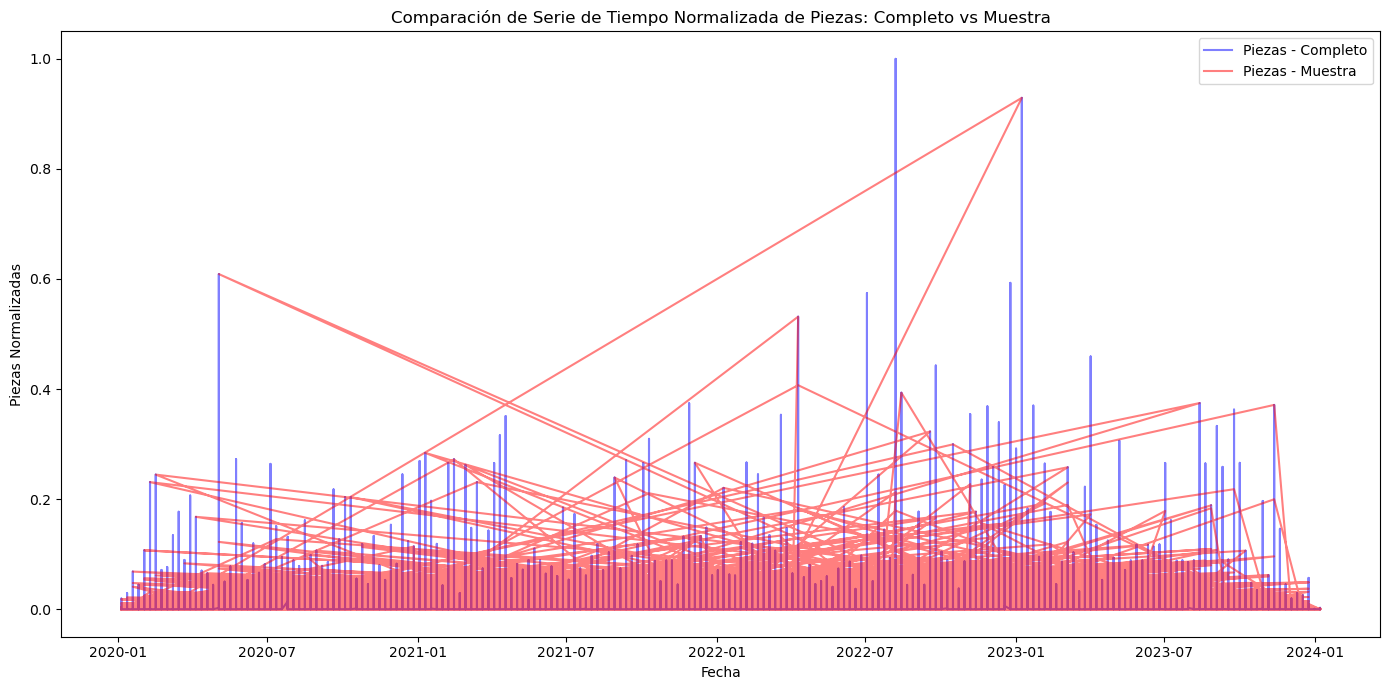

In [63]:
# Supongamos que df es tu DataFrame original y df_sample es tu muestra

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el scaler al conjunto completo para la columna 'Piezas'
scaler.fit(df[['Piezas']])

# Transformar tanto el conjunto completo como la muestra
df['Piezas_Normalized'] = scaler.transform(df[['Piezas']])
df_sample = df.sample(frac=0.3, random_state=42)  # Recrear la muestra para demostración
df_sample['Piezas_Normalized'] = scaler.transform(df_sample[['Piezas']])

# Visualización de la serie de tiempo normalizada del conjunto completo y la muestra
plt.figure(figsize=(14, 7))

# Serie de tiempo completa normalizada
plt.plot(df['Fecha'], df['Piezas_Normalized'], label='Piezas - Completo', color='blue', alpha=0.5)
# Serie de tiempo de la muestra normalizada
plt.plot(df_sample['Fecha'], df_sample['Piezas_Normalized'], label='Piezas - Muestra', color='red', alpha=0.5)

plt.title('Comparación de Serie de Tiempo Normalizada de Piezas: Completo vs Muestra')
plt.xlabel('Fecha')
plt.ylabel('Piezas Normalizadas')
plt.legend()
plt.tight_layout()
plt.show()



Este enfoque te permite observar directamente cómo la muestra seleccionada se compara con el conjunto de datos completo en términos de la variabilidad y tendencias generales en las 'Piezas'.

#### Análisis Estadístico

Vamos a proceder con el análisis estadístico comparativo entre la muestra y el conjunto completo utilizando la columna 'Piezas_Normalized'. La idea es verificar si hay diferencias estadísticamente significativas entre las medias de la muestra y del conjunto completo. Esto nos ayudará a entender si la muestra es representativa del conjunto completo en términos de la variable 'Piezas'.

In [64]:
from scipy import stats

# Suponemos que ya tienes df y df_sample con 'Piezas_Normalized'

# Asegurarse de que ambos dataframes están preparados
scaler = MinMaxScaler()
df['Piezas_Normalized'] = scaler.fit_transform(df[['Piezas']])
df_sample['Piezas_Normalized'] = scaler.transform(df_sample[['Piezas']])

# Realizar la prueba T
t_stat, p_value = stats.ttest_ind(df['Piezas_Normalized'], df_sample['Piezas_Normalized'], equal_var=False)

# Imprimir los resultados
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 0.545042213485454, P-value: 0.5857244946071516


In [65]:
import numpy as np

def create_sequences(data, window_size):
    sequences = []
    targets = []
    for i in range(len(data) - window_size):
        seq = data[i:i+window_size]
        target = data[i+window_size]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Suponiendo que Piezas_Normalized es tu columna de interés
window_size = 4
X, y = create_sequences(df_sample['Piezas_Normalized'].values, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape para CNN

In [66]:
# Definir tamaños para la división
train_size = int(len(X) * 0.7)  # 70% de los datos para entrenamiento
val_size = int(len(X) * 0.2)  # 20% de los datos para validación
test_size = len(X) - train_size - val_size  # 10% restante para prueba

# División de los datos en entrenamiento, validación y prueba
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[-test_size:], y[-test_size:]


Crear el modelo

In [67]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense

# # Definir la arquitectura del modelo
# model = Sequential([
#     Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
#     MaxPooling1D(pool_size=2),
#     LSTM(50),
#     Dense(1)
# ])

# # Compilar el modelo
# model.compile(optimizer='adam', loss='mse')

### Explicación de la Arquitectura del Modelo

- **Conv1D:** La primera capa es una capa convolucional que procesará cada secuencia de entrada. Con `filters=64` y `kernel_size=2`, esta capa intentará extraer características útiles de pequeños segmentos de la entrada.
- **MaxPooling1D:** Esta capa reduce la dimensionalidad de los datos de entrada, tomando el máximo valor de cada ventana de tamaño especificado (`pool_size=2`). Esto ayuda a hacer el modelo más eficiente y a reducir el overfitting.
- **LSTM:** Las capas LSTM son capaces de aprender dependencias a largo plazo y son comúnmente usadas en problemas de series de tiempo. `LSTM(50)` significa que esta capa tiene 50 unidades, lo que afecta a la capacidad del modelo para aprender la estructura temporal.
- **Dense:** Una capa densa que produce la salida del modelo. Dado que es un problema de regresión (asumiendo que estás tratando de predecir un valor continuo), solo tiene una unidad.

Entrenamiento del Modelo

In [68]:
# history = model.fit(
#     X_train, y_train,
#     epochs=20,
#     validation_data=(X_val, y_val)
# )

In [69]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='validation')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [70]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

# # Definir la arquitectura del modelo con Dropout
# model = Sequential([
#     Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
#     MaxPooling1D(pool_size=2),
#     Dropout(0.5),  # Añadir dropout para regularización
#     LSTM(50),
#     Dropout(0.5),  # Añadir dropout tras la capa LSTM
#     Dense(1)
# ])

# # Compilar el modelo
# model.compile(optimizer='adam', loss='mse')


In [71]:
# from tensorflow.keras.optimizers import Adam

# # Ajustar la tasa de aprendizaje
# optimizer = Adam(learning_rate=0.001)  # Puedes ajustar este valor según sea necesario
# model.compile(optimizer=optimizer, loss='mse')


In [72]:
# from tensorflow.keras.optimizers import legacy

# # Usar la versión legacy de Adam optimizada para M1/M2
# optimizer = legacy.Adam(learning_rate=0.001)

# # Compilar el modelo con el optimizador legacy
# model.compile(optimizer=optimizer, loss='mse')


In [73]:
# history = model.fit(
#     X_train, y_train,
#     epochs=30,  # Ajusta este número según sea necesario
#     validation_data=(X_val, y_val)
# )


In [74]:

# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='validation')
# plt.title('Model Loss with Legacy Optimizer')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [75]:
# test_loss = model.evaluate(X_test, y_test)
# print(f'Final Test Loss with Legacy Optimizer: {test_loss}')


In [76]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau

# # Definir el callback de reducción de la tasa de aprendizaje
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

# # Añadir el callback al entrenamiento
# history = model.fit(
#     X_train, y_train,
#     epochs=30,
#     validation_data=(X_val, y_val),
#     callbacks=[reduce_lr]
# )


In [77]:
from tensorflow.keras.models import load_model

# Cargar el modelo
model = load_model('mi_modelo.h5')

2024-05-06 21:05:55.832664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-06 21:05:55.833252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-06 21:05:55.834138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [78]:
# # Guardar el modelo completo en un archivo HDF5
# model.save('mi_modelo.h5')  # Guarda el modelo como un archivo .h5

In [79]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


  108/23909 [..............................] - ETA: 11s - loss: 3.9071e-08    

2024-05-06 21:05:56.053408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-06 21:05:56.054418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-06 21:05:56.055038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

23909/23909 [==============================] - 9s 379us/step - loss: 1.2367e-06
Test Loss: 1.2367186172923539e-06


In [80]:

# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='validation')
# plt.title('Model Loss with ReduceLROnPlateau')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

23909/23909 [==============================] - 8s 350us/step


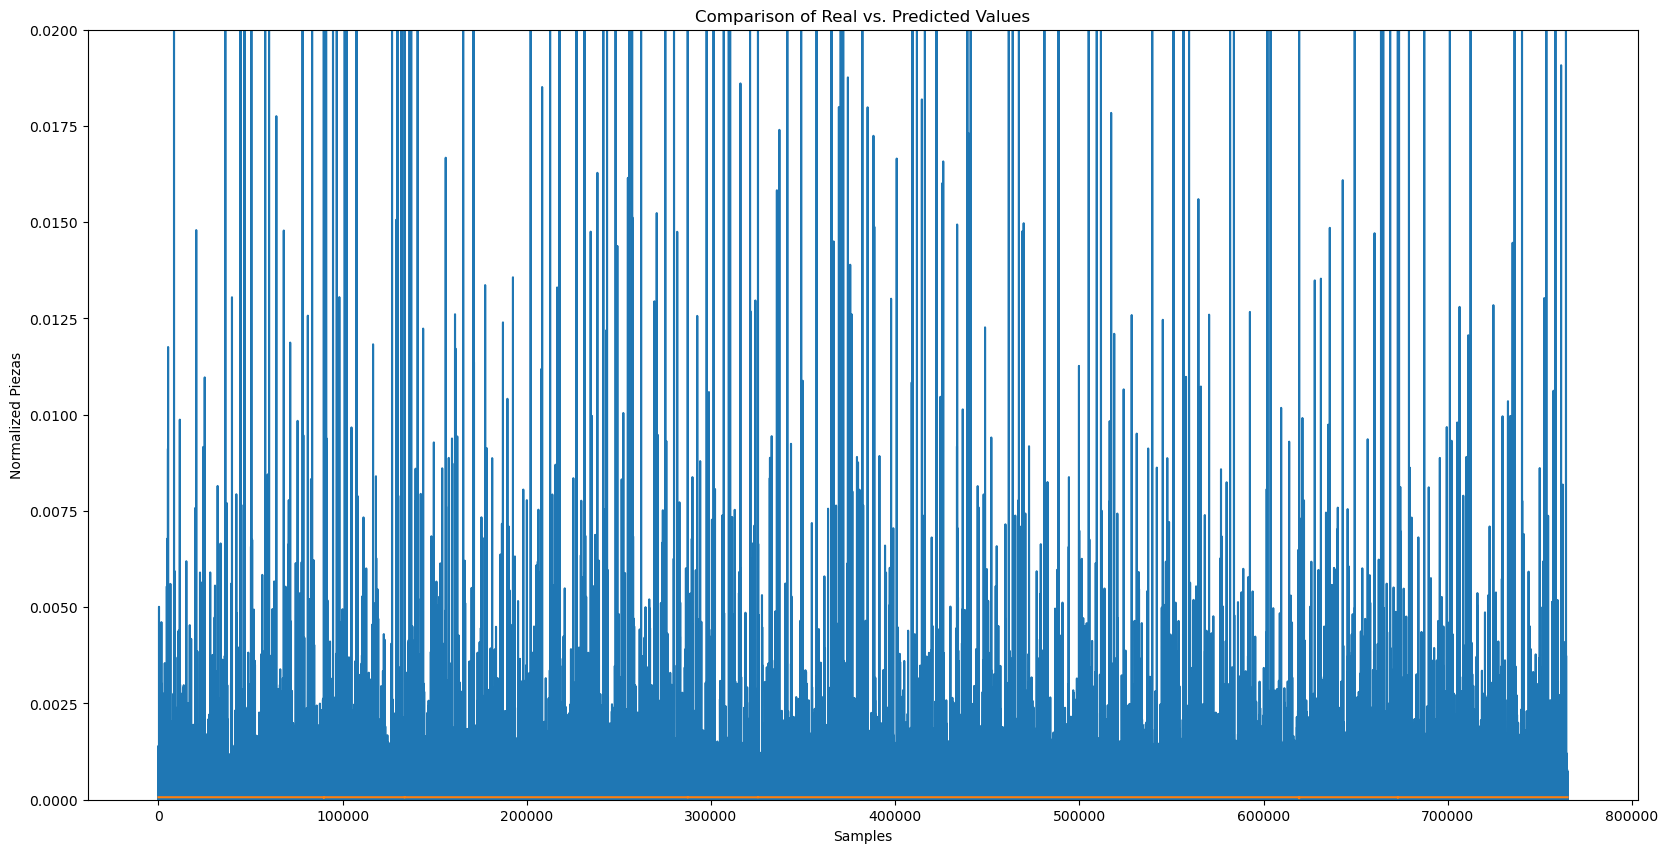

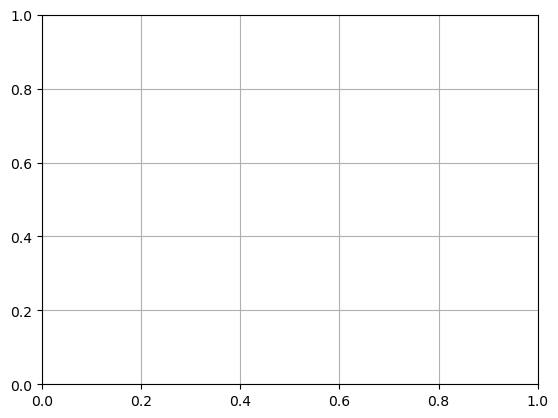

In [120]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Visualización de las predicciones frente a los valores reales
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(y_test, label='Real')
plt.plot(predictions, label='Predicted')
plt.title('Comparison of Real vs. Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Normalized Piezas')
plt.ylim(0,0.02)
plt.show()
plt.grid(True)




In [114]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Calcular MSE y MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")

Error Cuadrático Medio (MSE): 1.236716020699351e-06
Error Absoluto Medio (MAE): 8.552208222602719e-05


In [82]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

23909/23909 [==============================] - 9s 365us/step - loss: 1.2367e-06
Test Loss: 1.2367186172923539e-06


In [83]:
# Evaluar el modelo cargado
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Hacer predicciones
predictions = model.predict(X_test)

# Calcular RMSE para evaluación
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


23909/23909 [==============================] - 8s 354us/step - loss: 1.2367e-06
Test Loss: 1.2367186172923539e-06
23909/23909 [==============================] - 8s 342us/step
Root Mean Squared Error (RMSE): 0.001112077344746916


In [100]:

# Calcular MSE y MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")


ValueError: Found input variables with inconsistent numbers of samples: [765085, 49]

In [ ]:
# Asumir que las etiquetas de prueba (Y_test) ya están en forma numérica
matriz_confusion = confusion_matrix(Y_test, predictions.round()

print("Matriz de Confusión:")
print(matriz_confusion)

In [84]:
# Asumiendo que 'df' es tu DataFrame y que 'valor' es la columna que quieres predecir
grouped = df.groupby(pd.Grouper(key='Fecha', freq='M'))

# Este diccionario contendrá los datos de entrada por mes
monthly_data = {}

for name, group in grouped:
    if not group.empty:
        monthly_data[name] = group['Piezas'].values


/var/folders/hk/d4srtpks0y1f7n93rjjq1wf40000gn/T/ipykernel_1478/848754112.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Fecha', freq='M'))


In [85]:
# Suponiendo que tienes una función create_sequences como la definida antes
monthly_sequences = {}
for month, data in monthly_data.items():
    X, _ = create_sequences(data, window_size)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    monthly_sequences[month] = X


In [86]:
monthly_predictions = {}
for month, sequences in monthly_sequences.items():
    if sequences.size > 0:  # Asegúrate de que hay datos para predecir
        predictions = model.predict(sequences)
        monthly_predictions[month] = predictions


2451/2451 [==============================] - 1s 352us/step


In [87]:
# Ejemplo de cómo visualizar o analizar resultados
for month, predictions in monthly_predictions.items():
    print(f"Predicciones para {month}: {predictions}")


Predicciones para 2020-01-31 00:00:00: [[6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]
 ...
 [6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]]
Predicciones para 2020-02-29 00:00:00: [[6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]
 ...
 [6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]]
Predicciones para 2020-03-31 00:00:00: [[6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]
 ...
 [6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]]
Predicciones para 2020-04-30 00:00:00: [[6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]
 ...
 [6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]]
Predicciones para 2020-05-31 00:00:00: [[6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]
 ...
 [6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]]
Predicciones para 2020-06-30 00:00:00: [[6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]
 ...
 [6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]]
Predicciones para 2020-07-31 00:00:00: [[6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]
 ...
 [6.470918e-05]
 [6.470918e-05]
 [6.470918e-05]]
Predicciones 

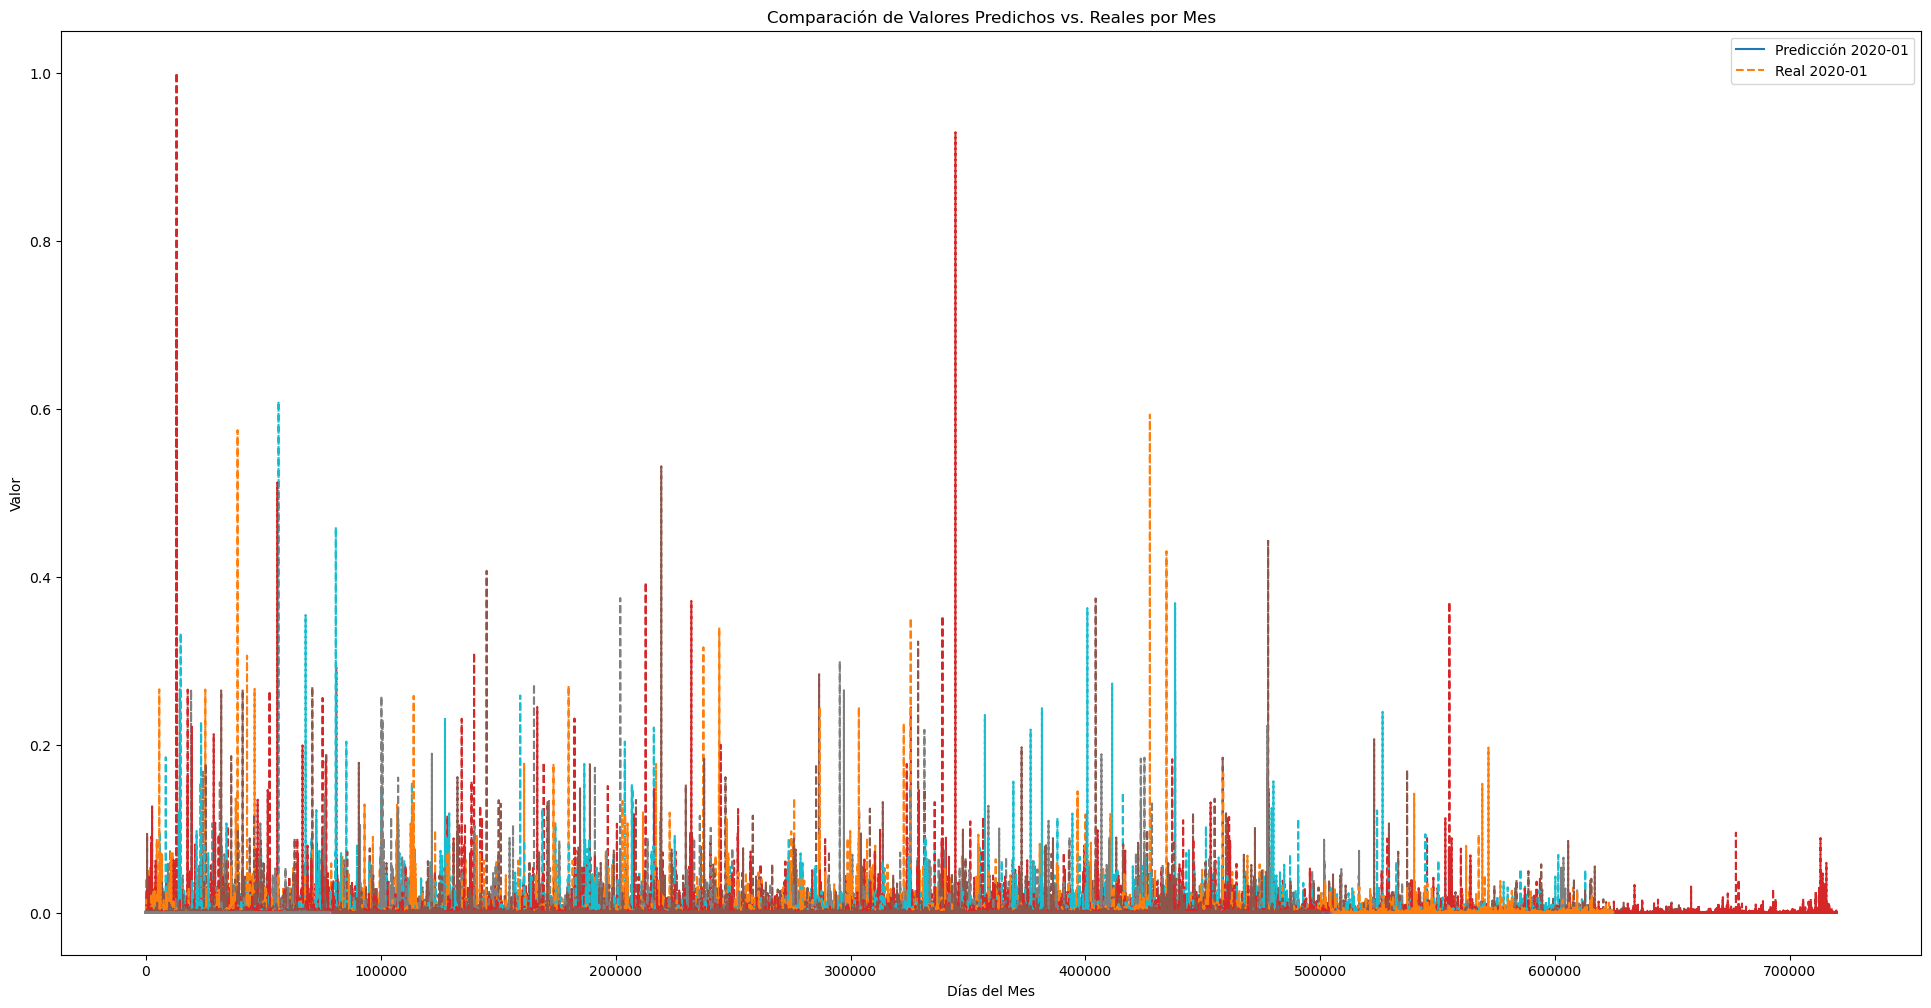

In [95]:
import matplotlib.pyplot as plt

# Suponiendo que `monthly_predictions` contiene las predicciones y `monthly_actuals` contiene los valores reales
months = sorted(monthly_predictions.keys())  # Asegúrate de que las claves sean comparables y estén ordenadas
predictions = [monthly_predictions[month].flatten() for month in months if month in monthly_predictions]
actuals = [monthly_data[month].flatten() for month in months if month in monthly_data]

# Configurar la visualización
plt.figure(figsize=(24, 12))  # Ajusta el tamaño según sea necesario
for i, month in enumerate(months):
    plt.plot(predictions[i], label=f'Predicción {month.strftime("%Y-%m")}' if i == 0 else "")
    plt.plot(actuals[i], label=f'Real {month.strftime("%Y-%m")}' if i == 0 else "", linestyle='--')
plt.title('Comparación de Valores Predichos vs. Reales por Mes')
plt.xlabel('Días del Mes')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [89]:
def moving_average(data, window_size):
    """ Calcula el promedio móvil utilizando una ventana específica. """
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Aplicar promedio móvil
smoothed_predictions = [moving_average(month, 10) for month in predictions]  # ajusta el tamaño de la ventana según sea necesario
smoothed_actuals = [moving_average(month, 10) for month in actuals]


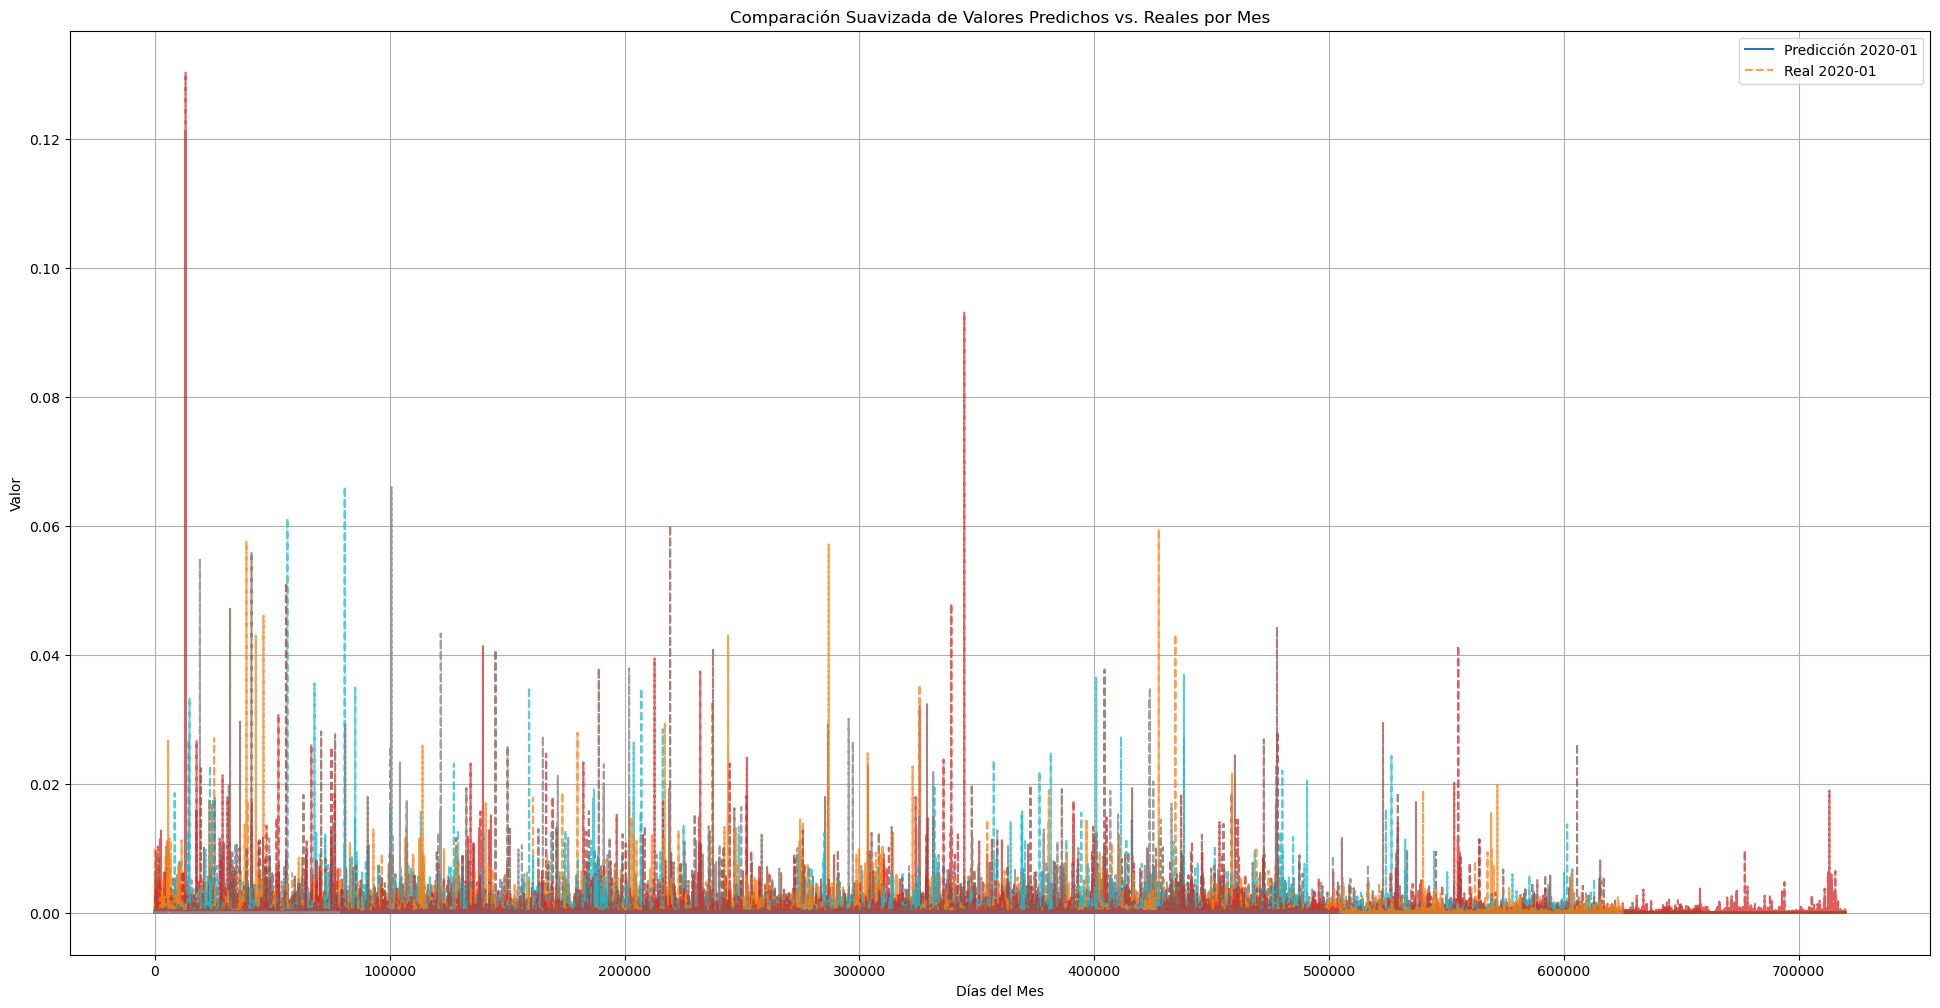

In [96]:
plt.figure(figsize=(24, 12))
for i, month in enumerate(months):
    plt.plot(smoothed_predictions[i], label=f'Predicción {month.strftime("%Y-%m")}' if i == 0 else "")
    plt.plot(smoothed_actuals[i], label=f'Real {month.strftime("%Y-%m")}' if i == 0 else "", linestyle='--', alpha=0.75)
plt.title('Comparación Suavizada de Valores Predichos vs. Reales por Mes')
plt.xlabel('Días del Mes')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


/opt/anaconda3/envs/DeepL/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


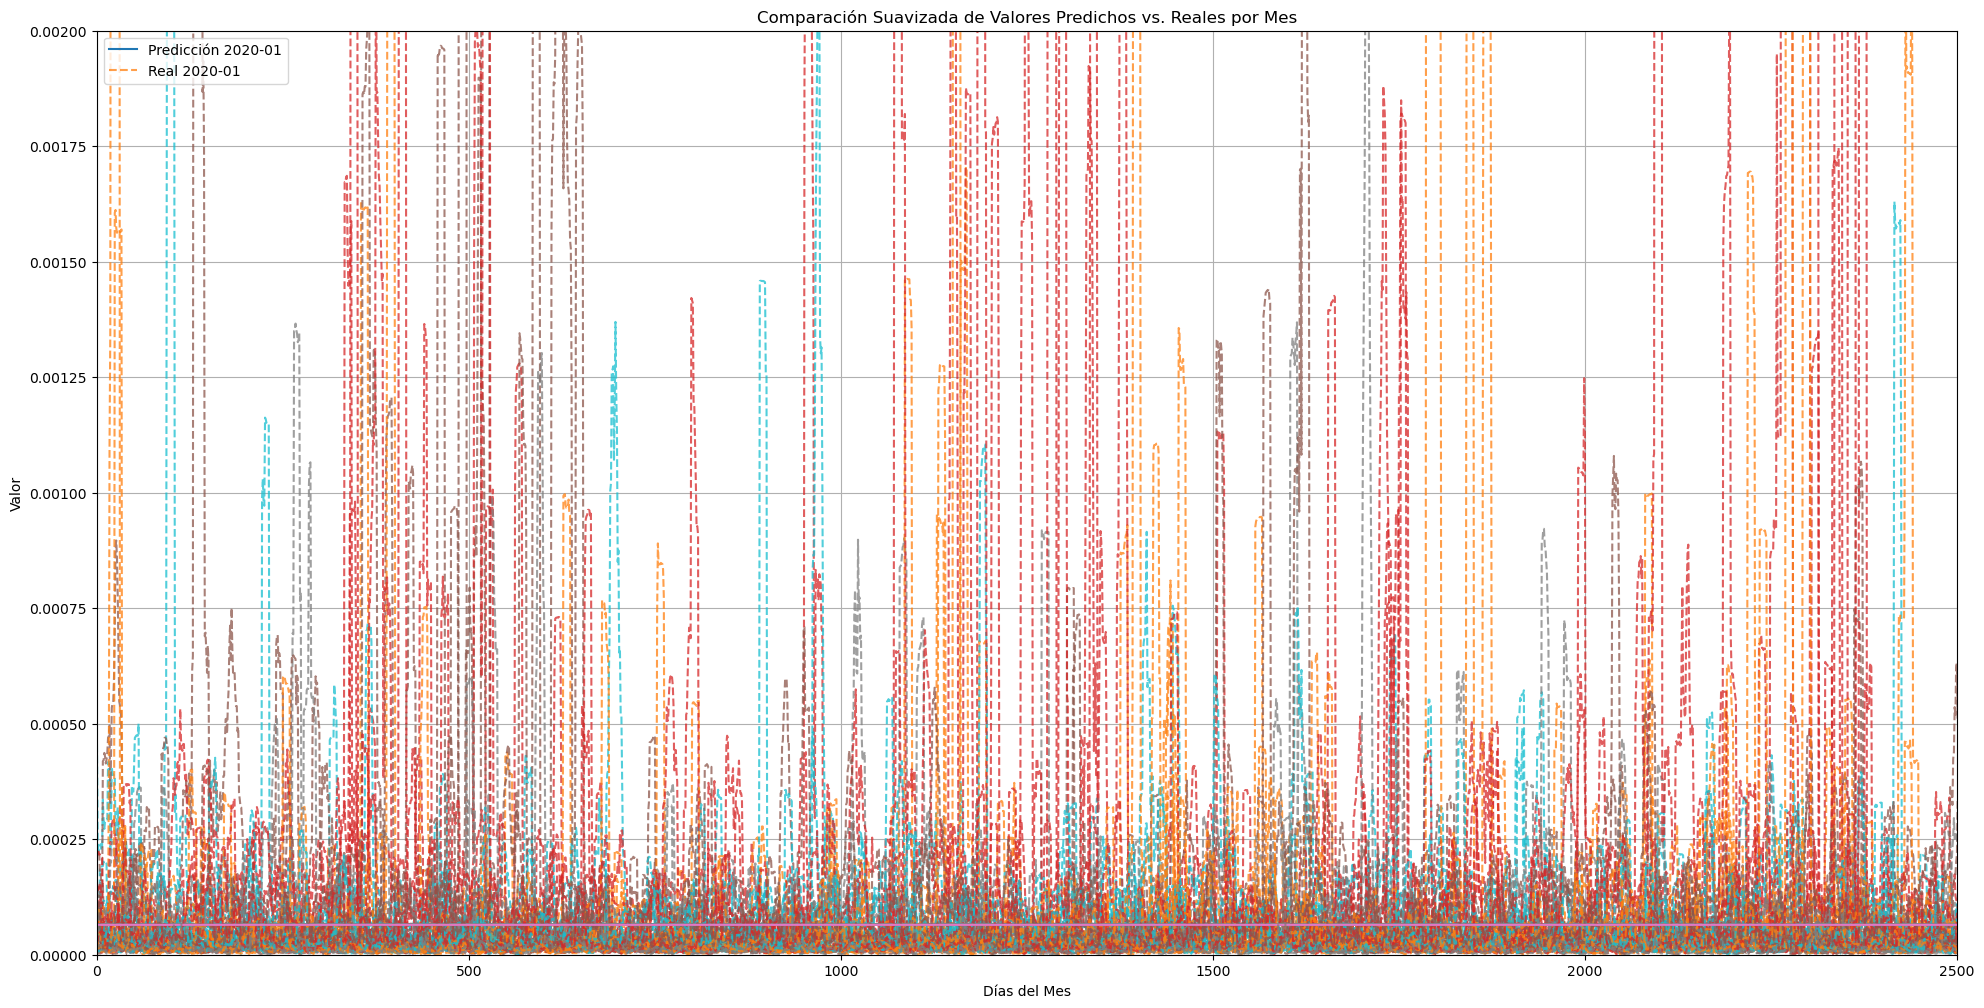

In [107]:
import matplotlib.pyplot as plt

# Configuración inicial del gráfico
plt.figure(figsize=(24, 12))
for i, month in enumerate(months):
    plt.plot(smoothed_predictions[i], label=f'Predicción {month.strftime("%Y-%m")}' if i == 0 else "")
    plt.plot(smoothed_actuals[i], label=f'Real {month.strftime("%Y-%m")}' if i == 0 else "", linestyle='--', alpha=0.75)

# Configurando el título y las etiquetas
plt.title('Comparación Suavizada de Valores Predichos vs. Reales por Mes')
plt.xlabel('Días del Mes')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

# Configuración para hacer zoom
# Estableciendo los límites del eje x
plt.xlim(0, 2500)
plt.ylim(0,0.002)  # Ajusta estos valores según la sección del gráfico que deseas ampliar

# Mostrar el gráfico
plt.show()


In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm (LSTM)                 (None, 50)                23000     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                        

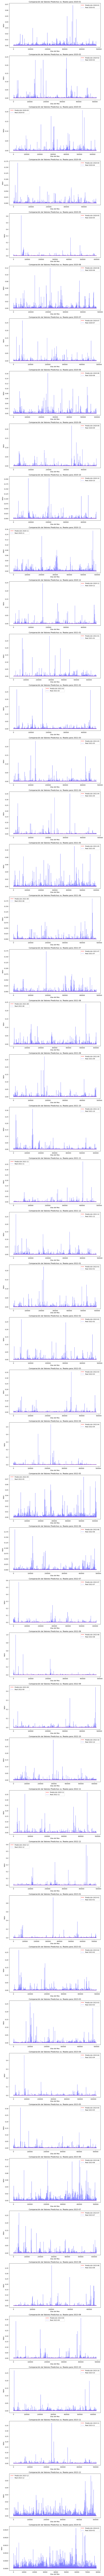

In [92]:
import matplotlib.pyplot as plt

# Suponiendo que `monthly_predictions` contiene las predicciones y `monthly_actuals` contiene los valores reales
months = sorted(monthly_predictions.keys())  # Asegúrate de que las claves sean comparables y estén ordenadas
predictions = [monthly_predictions[month].flatten() for month in months if month in monthly_predictions]
actuals = [monthly_data[month].flatten() for month in months if month in monthly_data]

# Configuración de la visualización
fig, axes = plt.subplots(nrows=len(months), ncols=1, figsize=(10, 5 * len(months)))  # Ajusta el tamaño según sea necesario

if len(months) == 1:  # Si solo hay un mes, axes no será un array
    axes = [axes]

for ax, month, pred, act in zip(axes, months, predictions, actuals):
    ax.plot(pred, label=f'Predicción {month.strftime("%Y-%m")}', color='red')
    ax.plot(act, label=f'Real {month.strftime("%Y-%m")}', linestyle='--', color='blue', alpha=0.5)
    ax.set_title(f'Comparación de Valores Predichos vs. Reales para {month.strftime("%Y-%m")}')
    ax.set_xlabel('Días del Mes')
    ax.set_ylabel('Valor')
    ax.legend()

plt.tight_layout()
plt.show()


In [93]:
# import matplotlib.pyplot as plt

# # Suponiendo que tienes listas o arrays de datos para cada mes
# data = [monthly_data[month].flatten() for month in sorted(monthly_data)]

# fig, axes = plt.subplots(nrows=len(data), ncols=1, figsize=(10, 5 * len(data)))  # Ajusta según la cantidad de datos

# for ax, month_data in zip(axes, data):
#     ax.plot(month_data)
#     ax.set_title("Título del Mes")
#     ax.set_xlabel("Días del Mes")
#     ax.set_ylabel("Valor")

# plt.tight_layout()
# plt.show()


In [94]:

# Asumir que las etiquetas de prueba (Y_test) ya están en forma numérica
matriz_confusion = confusion_matrix(Y_test, predicciones_classes)

print("Matriz de Confusión:")
print(matriz_confusion)


NameError: name 'Y_test' is not defined